## Alignment (over different temperatures)

In [3]:
import sys, os
sys.path.append('/home/luthra/understanding_ssl_v2/')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

In [51]:
import seaborn as sns
import matplotlib.ticker as mticker
import matplotlib.lines as mlines
from typing import List

def set_border(g):
    for spine in ['top', 'bottom', 'left', 'right']:
        g.spines[spine].set_color('black')
        g.spines[spine].set_linewidth(1)

def plot_xy(nscl_train, nscl_test,
            temperatures: List[str] = None,
            epochs: List[int] = None,
            y_label='RSA',
            output_path=None):
    
    sns.set_theme(style="whitegrid", font_scale=3.0, rc={"xtick.bottom": True, "ytick.left": True})
    sns.set_context(rc={'patch.linewidth': 2.0})
    
    plt.figure(figsize=(12, 10))

    x_train = [i+1 for i in epochs]
    x_test = [i+1 for i in epochs]

    # Color Choices for Better Contrast
    tau_colors = {'tau1': 'blue',
                  'tau2': 'orange',
                  'tau3': 'purple'}
    tau_values = {'tau1': 0.1,
                    'tau2': 0.5,
                    'tau3': 1.0}

    handles = []
    for tau in temperatures:
        g1 = sns.lineplot(x=x_train, y=nscl_train[tau], alpha=1.0, color=tau_colors[tau],
                          markersize=8, linewidth=2.0, label=f"NSCL Train {tau}")
        g2 = sns.lineplot(x=x_test, y=nscl_test[tau], alpha=0.75, linestyle='--', color=tau_colors[tau],
                          markersize=8, linewidth=2.0, label=f"NSCL Test {tau}")
        
        # Create Custom Legends
        handles.append(mlines.Line2D([], [], color=tau_colors[tau], linestyle='-', 
                                     label=f"$\\tau={tau_values[tau]}$"))


    set_border(plt.gca())

    style_handles = [
        mlines.Line2D([], [], color='black', linestyle='-', label='Train'),
        mlines.Line2D([], [], color='black', linestyle='--', label='Test')
    ]

    legend1 = plt.legend(handles = handles, loc = 'upper right', fontsize=30)
    plt.gca().add_artist(legend1)
    plt.legend(handles=style_handles, loc = 'upper right', bbox_to_anchor = (0.65, 1.0), fontsize=30)
    # plt.xscale('log')
    # plt.xticks([i+1 for i in x_train])
    
    plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.2f'))
    plt.xlabel("Training epochs")
    plt.ylabel(f"{y_label}")
    plt.tight_layout()
    if output_path:
        plt.savefig(output_path, bbox_inches='tight')
    plt.show()

In [56]:
all_datasets = ['cifar10', 'cifar100', 'tiny_imagenet', 'mini_imagenet']
dataset = all_datasets[1]

In [57]:
temperatures = ['tau1', 'tau2', 'tau3']

nscl_rsa_train = defaultdict(list)
nscl_rsa_test = defaultdict(list)
nscl_cka_train = defaultdict(list)
nscl_cka_test = defaultdict(list)

idx = 13 
for tau in temperatures:
    train_log_file = f"../results/{dataset}/alignment_tau/{tau}/train_alignment.csv"
    test_log_file = f"../results/{dataset}/alignment_tau/{tau}/test_alignment.csv"

    train_df = pd.read_csv(train_log_file, index_col='Epoch')
    test_df = pd.read_csv(test_log_file, index_col='Epoch')

    nscl_rsa_train[tau] = train_df['NSCL_RSA'].values[:idx]
    nscl_rsa_test[tau] = test_df['NSCL_RSA'].values[:idx]
    nscl_cka_train[tau] = train_df['NSCL_CKA'].values[:idx]
    nscl_cka_test[tau] = test_df['NSCL_CKA'].values[:idx]
epochs = train_df.index.values[:idx]

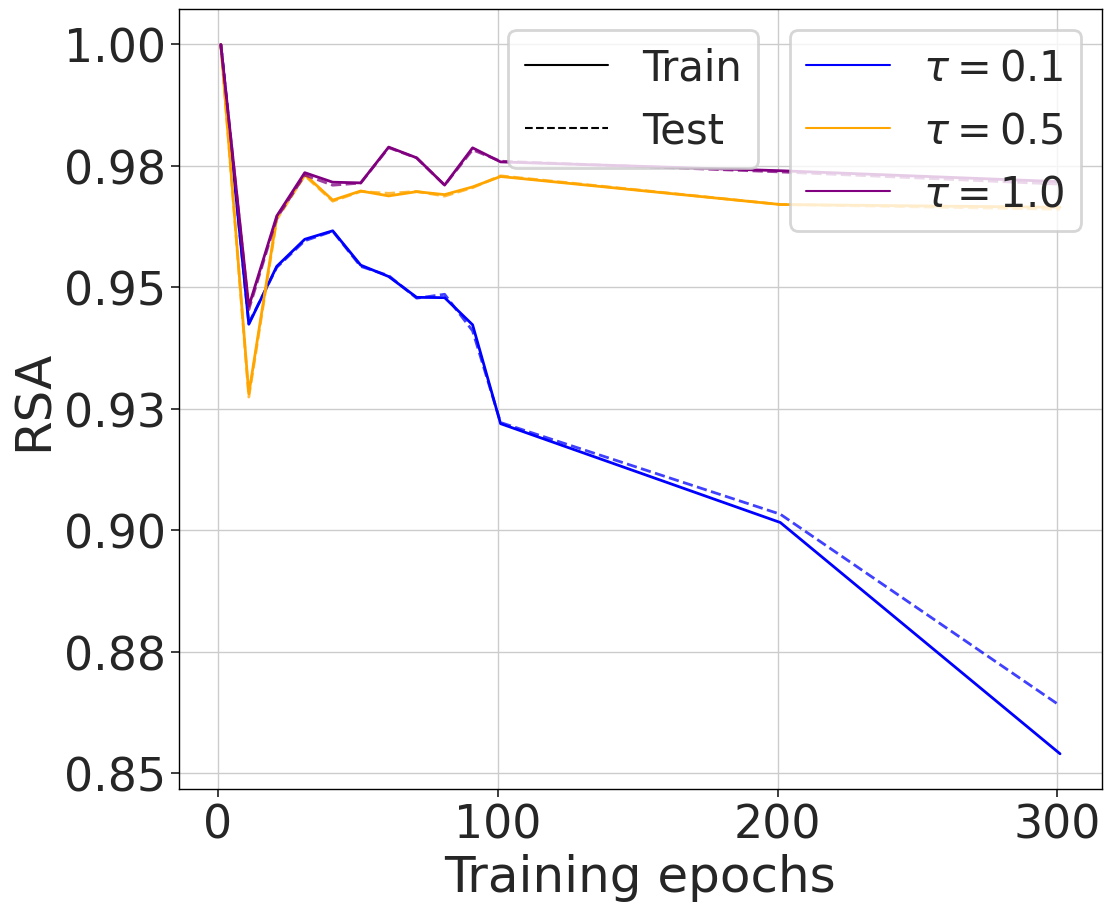

In [58]:
# RSA plot

plot_xy(nscl_rsa_train, nscl_rsa_test,
        temperatures,
        epochs=epochs,
        y_label='RSA',
        output_path=f'../figures/tau/{dataset}_rsa_plot.pdf')

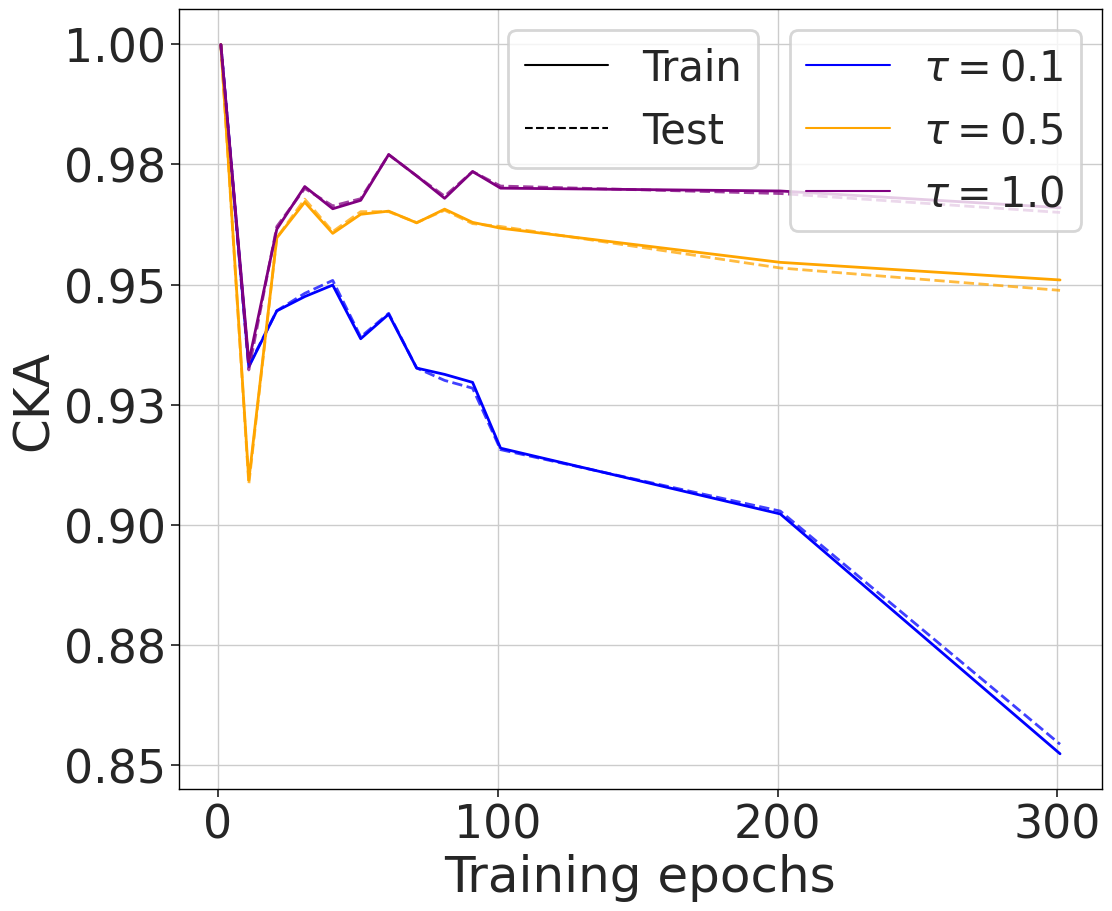

In [59]:
# CKA plot
plot_xy(nscl_cka_train, nscl_cka_test,
        temperatures,
        epochs=epochs,
        y_label='CKA',
        output_path=f'../figures/tau/{dataset}_cka_plot.pdf')

# NCCC

In [ ]:
all_datasets = ['cifar10', 'cifar100', 'tiny_imagenet', 'mini_imagenet']
dataset = all_datasets[2]

In [ ]:
import seaborn as sns
import matplotlib.ticker as mticker
import matplotlib.lines as mlines

def set_border(g):
    for spine in ['top', 'bottom', 'left', 'right']:
        g.spines[spine].set_color('black')
        g.spines[spine].set_linewidth(1)

def plot_xy(dcl_train, dcl_test,
            nscl_train, nscl_test,
            scl_train, scl_test, 
            ce_train, ce_test,
            epochs,
            y_label='RSA',
            output_path=None):
    
    sns.set_theme(style="whitegrid", font_scale=3.0, rc={"xtick.bottom": True, "ytick.left": True})
    sns.set_context(rc={'patch.linewidth': 2.0})
    
    plt.figure(figsize=(12, 10))

    x_train = [i+1 for i in epochs]
    x_test = [i+1 for i in epochs]

    # Color Choices for Better Contrast
    nscl_color = 'blue'
    scl_color = 'red'
    ce_color = 'green'
    dcl_color = 'orange'

    # NSCL
    g1 = sns.lineplot(x=x_train, y=nscl_train, alpha=1.0, color=nscl_color,
                      markersize=8, linewidth=2.0, label="NSCL Train")
    
    g2 = sns.lineplot(x=x_test, y=nscl_test, alpha=0.75, linestyle='--', color=nscl_color,
                      markersize=8, linewidth=2.0, label="NSCL Test")

    # SCL
    g3 = sns.lineplot(x=x_train, y=scl_train, alpha=1.0, color=scl_color,
                      markersize=8, linewidth=2.0, label="SCL Train")
    
    g4 = sns.lineplot(x=x_test, y=scl_test, alpha=0.75, linestyle='--', color=scl_color,
                      markersize=8, linewidth=2.0, label="SCL Test")

    # CE
    g5 = sns.lineplot(x=x_train, y=ce_train, alpha=1.0, color=ce_color,
                      markersize=8, linewidth=2.0, label="CE Train")
    
    g6 = sns.lineplot(x=x_test, y=ce_test, alpha=0.75, linestyle='--', color=ce_color,
                      markersize=8, linewidth=2.0, label="CE Test")
    
    # DCL
    g7 = sns.lineplot(x=x_train, y=dcl_train, alpha=1.0, color=dcl_color,
                      markersize=8, linewidth=2.0, label="DCL Train")
    g8 = sns.lineplot(x=x_test, y=dcl_test, alpha=0.75, linestyle='--', color=dcl_color,
                      markersize=8, linewidth=2.0, label="DCL Test")

    set_border(plt.gca())

    # Create Custom Legends
    handles=[
        mlines.Line2D([], [], color=nscl_color, linestyle='-', label="NSCL"),
        mlines.Line2D([], [], color=scl_color, linestyle='-', label="SCL"),
        mlines.Line2D([], [], color=ce_color, linestyle='-', label="CE"),
        mlines.Line2D([], [], color=dcl_color, linestyle='-', label="DCL"),
    ]

    style_handles = [
        mlines.Line2D([], [], color='black', linestyle='-', label='Train'),
        mlines.Line2D([], [], color='black', linestyle='--', label='Test')
    ]

    legend1 = plt.legend(handles = handles, loc = 'lower right', fontsize=30)
    plt.gca().add_artist(legend1)
    plt.legend(handles=style_handles, loc = 'lower right', bbox_to_anchor = (0.7, 0.0), fontsize=30)
    plt.xscale('log')
    # plt.xticks([i+1 for i in x_train])
    
    plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.2f'))
    plt.xlabel("Training epochs")
    plt.ylabel(f"{y_label}")
    plt.tight_layout()
    if output_path:
        plt.savefig(output_path, bbox_inches='tight')
    plt.show()

In [ ]:
from collections import defaultdict

supervisions = ['dcl', 'nscl', 'scl', 'ce']
ncccs = defaultdict(dict)
epochs = None
for sup in supervisions:
    log_file = f'../results/{dataset}/nccc/{sup}_nccc.csv'
    df = pd.read_csv(log_file, index_col='Epoch')
    ncccs[sup]['train'] = df['NCCC Train'].values
    ncccs[sup]['test'] = df['NCCC Test'].values

    if epochs is None:
        epochs = df.index

In [ ]:
# idx = 22 # cifar10
idx = 17 # cifar100, mini_imagenet, tiny_imagenet

plot_xy(ncccs['dcl']['train'][:idx], ncccs['dcl']['test'][:idx],
        ncccs['nscl']['train'][:idx], ncccs['nscl']['test'][:idx],
        ncccs['scl']['train'][:idx], ncccs['scl']['test'][:idx],
        ncccs['ce']['train'][:idx], ncccs['ce']['test'][:idx],
        epochs=epochs[:idx],
        y_label='NCCC',
        output_path=f'../figures/nccc/{dataset}_nccc_plot.pdf')

# CDNV

In [52]:
all_datasets = ['cifar10', 'cifar100', 'tiny_imagenet', 'mini_imagenet']
dataset = all_datasets[2]

In [53]:
from collections import defaultdict

supervisions = ['dcl', 'nscl', 'scl', 'ce']
cdnvs = defaultdict(dict)
dir_cdnvs = defaultdict(dict)
epochs = None
for sup in supervisions:
    log_file = f'../results/{dataset}/geometry/{sup}_geom.csv'
    df = pd.read_csv(log_file, index_col='Epoch')
    cdnvs[sup]['train'] = df['CDNV Train'].values
    cdnvs[sup]['test'] = df['CDNV Test'].values
    dir_cdnvs[sup]['train'] = df['d-CDNV Train'].values
    dir_cdnvs[sup]['test'] = df['d-CDNV Test'].values

    if epochs is None:
        epochs = df.index

In [55]:
import seaborn as sns
import matplotlib.ticker as mticker
import matplotlib.lines as mlines

def set_border(g):
    for spine in ['top', 'bottom', 'left', 'right']:
        g.spines[spine].set_color('black')
        g.spines[spine].set_linewidth(1)

def plot_xy(dcl_train, dcl_test,
            nscl_train, nscl_test,
            scl_train, scl_test, 
            ce_train, ce_test,
            epochs,
            y_label='RSA',
            output_path=None):
    
    sns.set_theme(style="whitegrid", font_scale=3.0, rc={"xtick.bottom": True, "ytick.left": True})
    sns.set_context(rc={'patch.linewidth': 2.0})
    
    plt.figure(figsize=(12, 10))

    x_train = [i+1 for i in epochs]
    x_test = [i+1 for i in epochs]

    # Color Choices for Better Contrast
    nscl_color = 'blue'
    scl_color = 'red'
    ce_color = 'green'
    dcl_color = 'orange'

    # NSCL
    g1 = sns.lineplot(x=x_train, y=nscl_train, alpha=1.0, color=nscl_color,
                      markersize=8, linewidth=2.0, label="NSCL Train")
    
    g2 = sns.lineplot(x=x_test, y=nscl_test, alpha=0.75, linestyle='--', color=nscl_color,
                      markersize=8, linewidth=2.0, label="NSCL Test")

    # SCL
    g3 = sns.lineplot(x=x_train, y=scl_train, alpha=1.0, color=scl_color,
                      markersize=8, linewidth=2.0, label="SCL Train")
    
    g4 = sns.lineplot(x=x_test, y=scl_test, alpha=0.75, linestyle='--', color=scl_color,
                      markersize=8, linewidth=2.0, label="SCL Test")

    # CE
    g5 = sns.lineplot(x=x_train, y=ce_train, alpha=1.0, color=ce_color,
                      markersize=8, linewidth=2.0, label="CE Train")
    
    g6 = sns.lineplot(x=x_test, y=ce_test, alpha=0.75, linestyle='--', color=ce_color,
                      markersize=8, linewidth=2.0, label="CE Test")
    
    # DCL
    g7 = sns.lineplot(x=x_train, y=dcl_train, alpha=1.0, color=dcl_color,
                      markersize=8, linewidth=2.0, label="DCL Train")
    g8 = sns.lineplot(x=x_test, y=dcl_test, alpha=0.75, linestyle='--', color=dcl_color,
                      markersize=8, linewidth=2.0, label="DCL Test")

    set_border(plt.gca())

    # Create Custom Legends
    handles=[
        mlines.Line2D([], [], color=nscl_color, linestyle='-', label="NSCL"),
        mlines.Line2D([], [], color=scl_color, linestyle='-', label="SCL"),
        mlines.Line2D([], [], color=ce_color, linestyle='-', label="CE"),
        mlines.Line2D([], [], color=dcl_color, linestyle='-', label="DCL"),
    ]

    style_handles = [
        mlines.Line2D([], [], color='black', linestyle='-', label='Train'),
        mlines.Line2D([], [], color='black', linestyle='--', label='Test')
    ]

    legend1 = plt.legend(handles = handles, loc = 'upper right', fontsize=30)
    plt.gca().add_artist(legend1)
    plt.legend(handles=style_handles, loc = 'upper right', bbox_to_anchor = (0.67, 1.0), fontsize=30)
    plt.xscale('log')
    plt.yscale('log')
    # plt.xticks([i+1 for i in x_train])
    
    plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.2f'))
    plt.xlabel("Training epochs")
    plt.ylabel(f"{y_label}")
    plt.tight_layout()
    # if output_path:
    #     plt.savefig(output_path, bbox_inches='tight')
    plt.show()

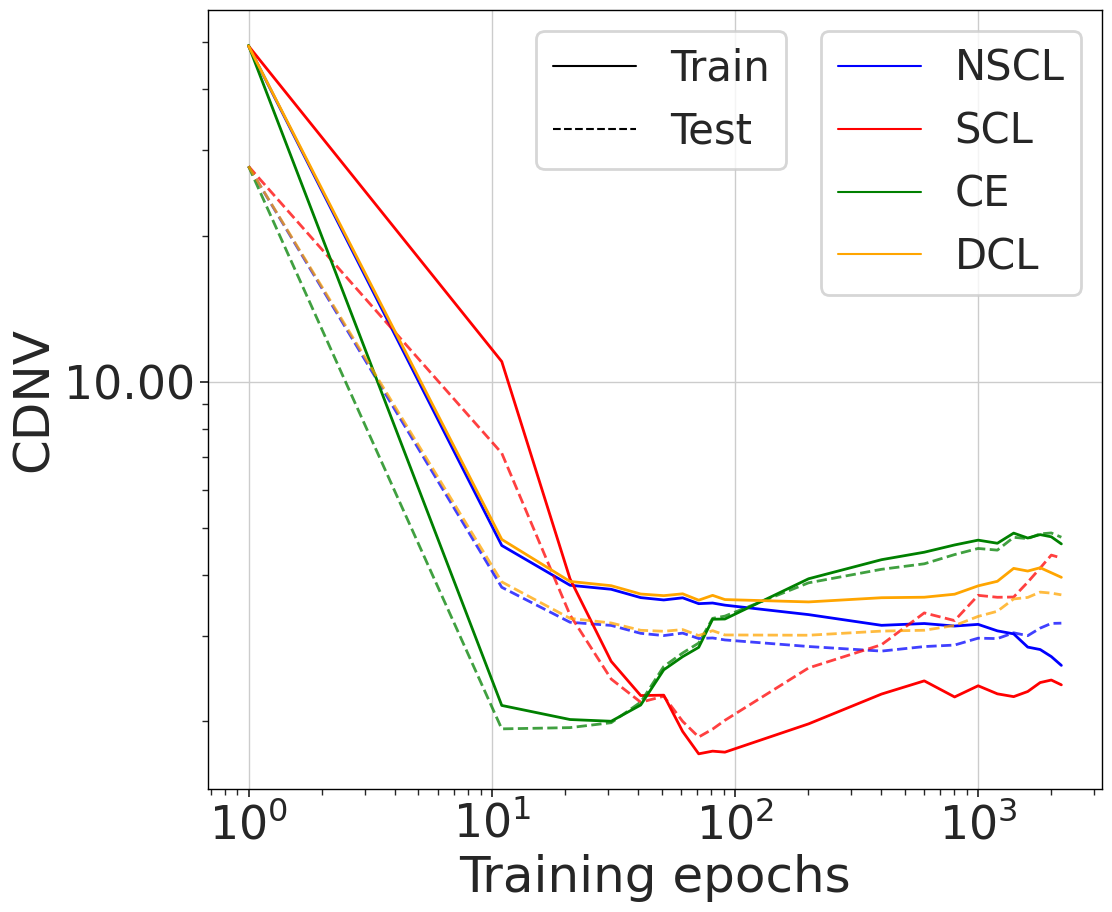

In [56]:
# idx = 22 # cifar10
idx = -1 # cifar100, mini_imagenet, tiny_imagenet

plot_xy(cdnvs['dcl']['train'][:idx], cdnvs['dcl']['test'][:idx],
        cdnvs['nscl']['train'][:idx], cdnvs['nscl']['test'][:idx],
        cdnvs['scl']['train'][:idx], cdnvs['scl']['test'][:idx],
        cdnvs['ce']['train'][:idx], cdnvs['ce']['test'][:idx],
        epochs=epochs[:idx],
        y_label='CDNV',
        output_path=f'../figures/cdnv/{dataset}_cdnv_plot.pdf')

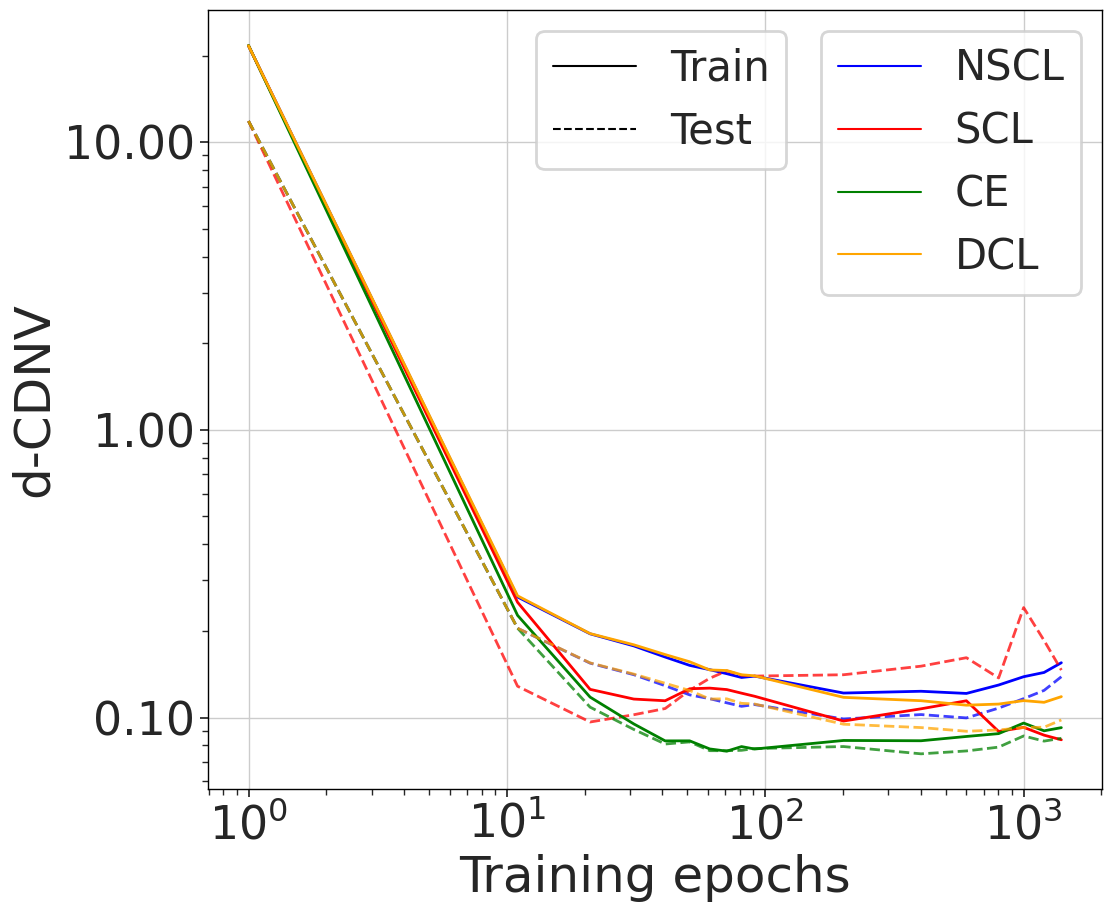

In [49]:
# idx = 22 # cifar10
idx = 17 # cifar100, mini_imagenet, tiny_imagenet

plot_xy(dir_cdnvs['dcl']['train'][:idx], dir_cdnvs['dcl']['test'][:idx],
        dir_cdnvs['nscl']['train'][:idx], dir_cdnvs['nscl']['test'][:idx],
        dir_cdnvs['scl']['train'][:idx], dir_cdnvs['scl']['test'][:idx],
        dir_cdnvs['ce']['train'][:idx], dir_cdnvs['ce']['test'][:idx],
        epochs=epochs[:idx],
        y_label='d-CDNV',
        output_path=f'../figures/dir_cdnv/{dataset}_dir_cdnv_plot.pdf')